In [2]:
#TODO
# try to load model from disk (not sure if its possible) and do model.predict on test set to find out which examples were mispredicted

import tensorflow as tf
from tensorflow import keras

In [3]:
base_model = tf.keras.applications.ResNet50(
input_shape=(32, 32, 3),
include_top=False,
weights=None,
)
base_model = tf.keras.Model(
base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
)

inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.applications.resnet.preprocess_input(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(10)(x)
model = tf.keras.Model(inputs, x)

model.compile(
optimizer=tf.keras.optimizers.Adam(lr=0.0001),
loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
metrics=["accuracy"],
)
model.load_weights("best_model")

In [4]:
batch_size = 8
test_data='../data/label_book'
test = tf.keras.preprocessing.image_dataset_from_directory(
    test_data,
    labels="inferred",
    label_mode="categorical",
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
    shuffle=False,
    seed=123,
    batch_size=batch_size,
    image_size=(32, 32),
)


Found 52 files belonging to 10 classes.


In [5]:
one_hots=[]
for _ in test:
    one_hots.append(_[1].numpy().tolist())

In [6]:
one_hots_flat=[]
for l in one_hots:
    for row in l:
        one_hots_flat.append(row)


In [7]:
import numpy as np
y_test=one_hots_flat
#y_test=np.array(y_test,dtype=float)

In [8]:
np.argmax(pred[3])

NameError: name 'pred' is not defined

In [11]:
y_labels=[np.argmax(_) for _ in y_test]

In [17]:
pred_labels=[np.argmax(_) for _ in probs]

In [13]:
len(y_labels)

52

In [14]:
len(indices)

NameError: name 'indices' is not defined

In [15]:

prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

probs = prob_model.predict(test)
#preds=


In [18]:
indices_of_wrong_pred = [i for i,pred in enumerate(pred_labels) if pred!=y_labels[i]]
#for i,v in enumerate(pred):
#    if pred[i]!=y_test[i]:
#        print(i,v)

#subset_of_wrongly_predicted = [x_test[i] for i in indices ]

In [ ]:
#TODO
#find index of wrong predictions

#pred = model.predict(x_test)
#indices = [i for i,v in enumerate(pred) if pred[i]!=y_test[i]]
#subset_of_wrongly_predicted = [x_test[i] for i in indices ]

In [19]:
indices_of_wrong_pred

[1,
 7,
 8,
 12,
 13,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 27,
 30,
 32,
 33,
 36,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 51]

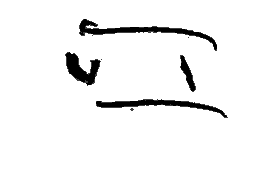

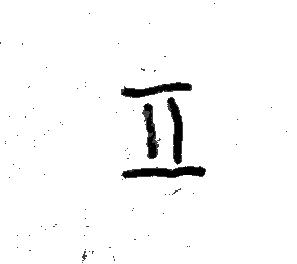

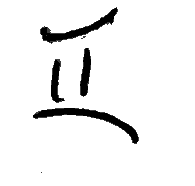

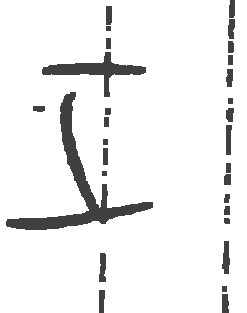

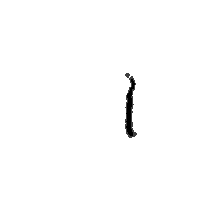

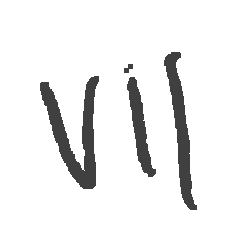

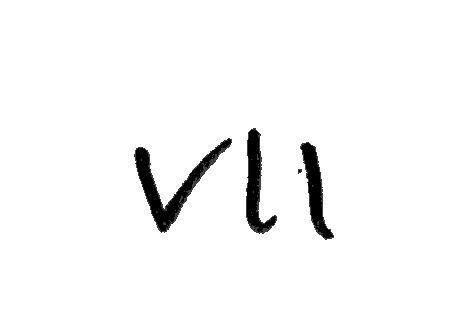

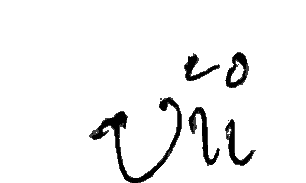

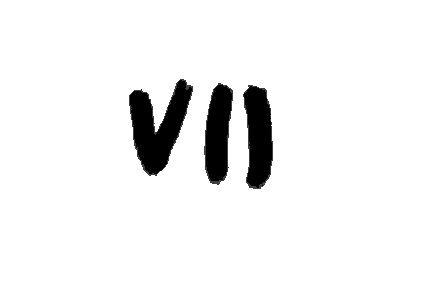

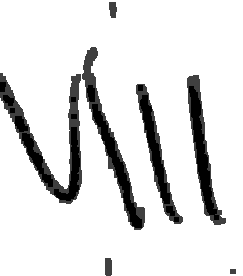

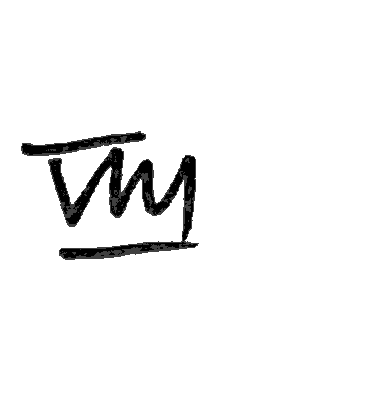

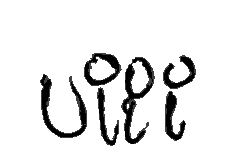

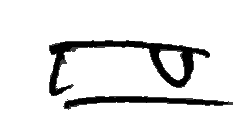

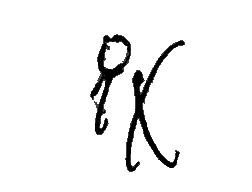

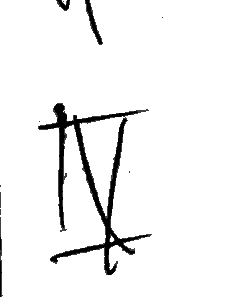

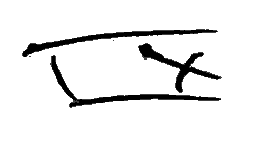

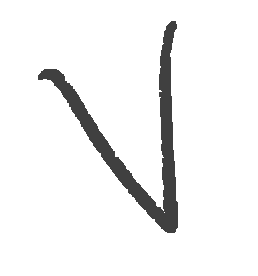

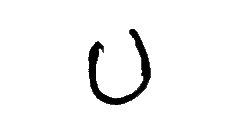

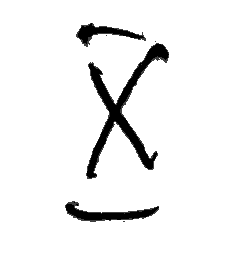

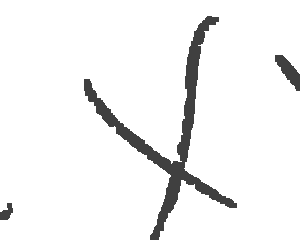

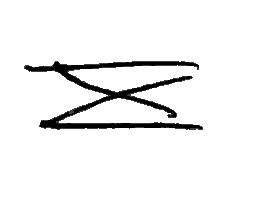

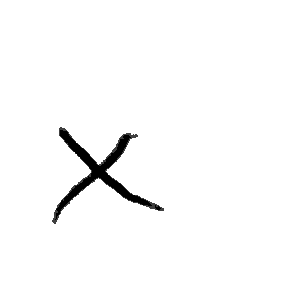

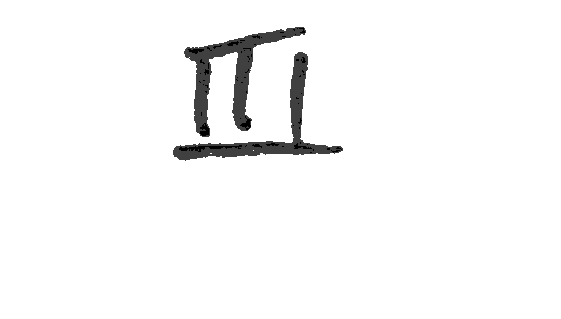

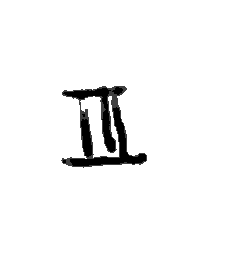

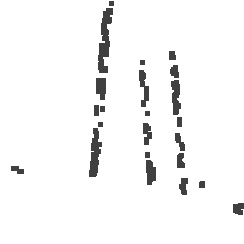

In [27]:
from IPython.display import Image, display
from pathlib import Path
def print_imgs_from_indices(indices,img_dir_path):
    p = Path(img_dir_path)
    all_img_paths=list(p.glob('**/*.png'))
    for i in indices:
        display(Image(filename=all_img_paths[i]))



    #Image(filename='test.png')
print_imgs_from_indices(indices_of_wrong_pred,'../data/label_book')